# Task 3 NLP 

Goal: To predict the "Primary Category" of the product using given data.

**By Atharv Jariath**

In [ ]:
#Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk

In [ ]:
# Importing the data into Notebook
Flipkart_orignal_data = pd.read_excel('flipkart_com-ecommerce_sample.xlsx')


# Data Analysis

After importing the data, a simple analysis of the data is done.

In [ ]:
Flipkart_orignal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [ ]:
#checking the head of the data 
Flipkart_orignal_data.head(n=10)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name..."
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
7,8542703ca9e6ebdf6d742638dfb1f2ca,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGYGHFUEXN,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/e/x...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,699.0,

In [ ]:
#to check the number of rows and cols
Flipkart_orignal_data.shape

(20000, 15)

Its important to check how much null data we have to,so no problems occur later on.

In [ ]:
Flipkart_orignal_data.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

Now, all the columns were enlisted so that we can decide which columns we can use as features for our Machine learning model.


In [ ]:
Flipkart_orignal_data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

## Rough Analysis

By glance, To predict the "Primary Category" of the given product we need "product_category_tree", "brand","product_name" columns for our model. Talking about "product_category_tree" we do have to clean it up and create another table called "primary_category" where the tree is cleaned and the correct category is extracted. "brand" coloumn have 5864
null values, which we need to take care of.


# Data Cleaning

Since we have done data analysis, we know that we need to clean our data.

**Lets start!**

In [ ]:
# Making a copy of orginal data
flipkart_data = Flipkart_orignal_data.copy()

In [ ]:
#Lets Drop the Un-required Coloumns.

flipkart_data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [ ]:
flipkart_data.drop(flipkart_data.columns[[0,1,2,5,6,7,8,9,11,12,14]], axis=1, inplace=True)

#Lets View the data Now
flipkart_data

,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons
...,...,...,...,...
19995,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign
19996,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra
19997,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection
19998,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection


Cleaning the ***product_category_tree***	column.

In [ ]:
# A function to Clean the product_category_tree and return Primary_Category
def clean_prod_category():
  primary_category=[]
  #iterate in col
  for ele in flipkart_data['product_category_tree']: 
    ele=ele.replace('"]',"")
    category=ele[2:].split(" >>")
    primary_category.append(category[0])
  
  #returinig the clean data
  return primary_category

In [ ]:
#Calling the function
primary_category=clean_prod_category()

#Verfying the output
primary_category

['Clothing',
 'Furniture',
 'Footwear',
 'Clothing',
 'Pet Supplies',
 'Eternal Gandhi Super Series Crystal Paper Weight...',
 'Clothing',
 'Furniture',
 'Footwear',
 'Clothing',
 'Footwear',
 'Clothing',
 'Pet Supplies',
 'Clothing',
 'Pens & Stationery',
 'Clothing',
 'Furniture',
 'Footwear',
 'Clothing',
 'Furniture',
 'Pet Supplies',
 'Clothing',
 'Clothing',
 'Footwear',
 'Pet Supplies',
 'Clothing',
 'Sports & Fitness',
 'Beauty and Personal Care',
 'Clothing',
 'Clothing',
 'Bengal Blooms Rose Artificial Plant  with Pot (3...',
 'Clothing',
 'Pens & Stationery',
 'Pens & Stationery',
 'Pens & Stationery',
 'Clothing',
 'Pens & Stationery',
 'Clothing',
 'Bags, Wallets & Belts',
 'Clothing',
 'Footwear',
 'Home Decor & Festive Needs',
 'Automotive',
 'Tools & Hardware',
 "Vishudh Printed Women's Straight Kurta",
 "Vishudh Printed Women's Straight Kurta",
 "Vishudh Printed Women's Anarkali Kurta",
 'BuildTrack PIR Wireless Motion Sensor - One Swit...',
 'Skayvon SUMMERSIBLE SINGL

In [ ]:
primary_category=pd.DataFrame(primary_category,columns=["Category"])
print("Number of Unique Categories",len(primary_category["Category"].value_counts()))

Number of Unique Categories 265


After looking at value_counts(), we can observe there is some **Unnecesarry Categories**.

In [ ]:
primary_category_top=Counter(primary_category["Category"]).most_common(266)
primary_category_top

[('Clothing', 6198),
 ('Jewellery', 3531),
 ('Footwear', 1227),
 ('Mobiles & Accessories', 1099),
 ('Automotive', 1012),
 ('Home Decor & Festive Needs', 929),
 ('Beauty and Personal Care', 710),
 ('Home Furnishing', 700),
 ('Kitchen & Dining', 647),
 ('Computers', 578),
 ('Watches', 530),
 ('Baby Care', 483),
 ('Tools & Hardware', 391),
 ('Toys & School Supplies', 330),
 ('Pens & Stationery', 313),
 ('Bags, Wallets & Belts', 265),
 ('Furniture', 180),
 ('Sports & Fitness', 166),
 ('Cameras & Accessories', 82),
 ('Home Improvement', 81),
 ('Health & Personal Care Appliances', 43),
 ('Sunglasses', 40),
 ('Gaming', 35),
 ('Pet Supplies', 30),
 ('Home & Kitchen', 24),
 ('Home Entertainment', 19),
 ('eBooks', 15),
 ('Eyewear', 10),
 ("Clovia Women's Full Coverage Bra", 9),
 ("Vishudh Printed Women's Straight Kurta", 8),
 ("Lilliput Top Baby Girl's  Combo", 8),
 ('Olvin Aviator Sunglasses', 7),
 ("Clovia Women's T-Shirt Bra", 6),
 ("MASARA Solid Women's Straight Kurta", 5),
 ('Dressberry Gol

### Now, to better Visualize the Data lets plot it.

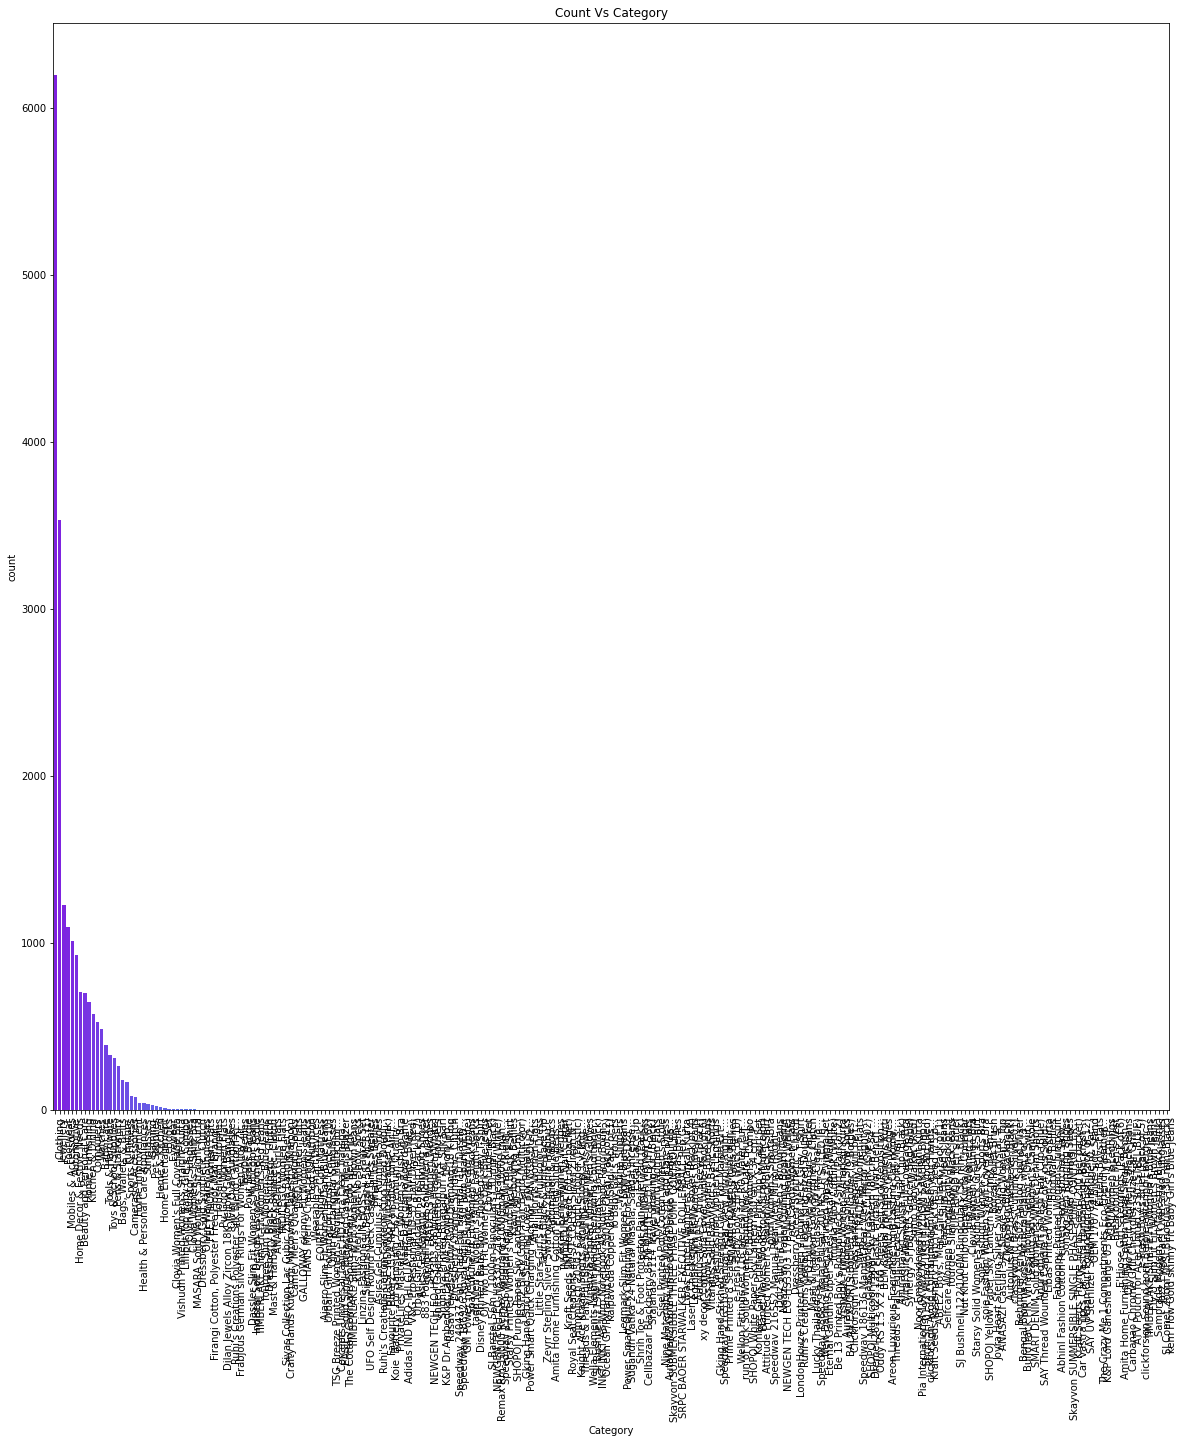

In [ ]:
# When we will try to plot the categories and its count , we will get a messy graph as there are 265 categories.

plt.figure(figsize=(20,20))
plt.title("Count Vs Category")
sns.countplot(x="Category",data=primary_category,palette="rainbow",
              order=primary_category["Category"].value_counts().index)
plt.xticks(rotation=90,fontsize = 10, ha='left')
plt.show()

### Observation-1 
We can now look at the plot and observe that there are way too many categories with less then 200 counts and a lot with just 1 and 2.
To Better visualize the data, Let's first observe the categories with high count.



In [ ]:
# A function which returns a output containg the top categories with more then 'n' counts.


# Here, n stands for the count of categories , and bottom, if you want the categories with most/least count.
# and 'List', do we need a list or dataframe.
def count_of_category(n,bottom=False,List=False):
    output=[]
    primary_category_top=Counter(primary_category["Category"]).most_common(266)
    if bottom:
      for i in primary_category_top:
        if i[1]<=n:
            output.append(i)
    else:
      for i in primary_category_top:
        if i[1]>=n:
          output.append(i)
    if not List:
      output=pd.DataFrame(output,columns=["Category","Count"])
    return output

In [ ]:
#Now lets try to find the categories with more then 500 counts 
top_500_category = count_of_category(500) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


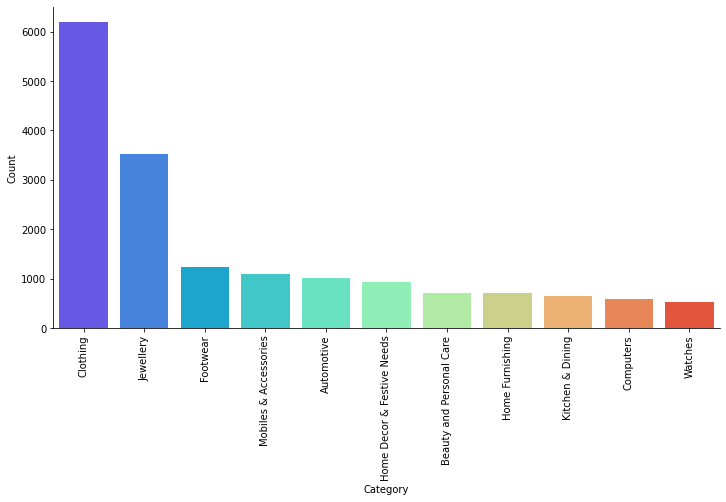

In [ ]:
sns.catplot("Category", "Count", data=top_500_category, kind='bar',aspect=2,palette='rainbow')
plt.xticks(rotation=90)
plt.show()


### Observation -2


Well, The data is unbalanced as ***Clothing*** has 6000+ counts while even ***Watches*** has less then 600. The proportions are bad. This will lead to a baised machine learning model. 



> To fix this problem without **Under-sampling**, we would require balanced data. Since we dont have that we can try **Over-sampling** the minorities.

But according the my analysis, we dont need to do that because even in the real-world, my data analysis says that the "Clothing" is generaly the most sold catergory for Flipkart and vice versa.

Now since, the real-world test data would also contain most probably the same proportion, we can get away by doing nothing.

*(This is my inital analysis, to have the correct approach, we would need to reasearch more about the shopping trends in Flipkart)*


---







## Unrequired Data
For Now, Let's look at the ineffectual data and see if we can make something useful out of it.


In [ ]:
#Let's see if its even feasible to visualize the categories with least counts
bottom_categories=count_of_category(500,bottom=True,List=True)

In [ ]:
print("The number of categories with count less then 500 :",len(bottom_categories))

The number of categories with count less then 500 : 254


As, we can see we still have 254 rows i.e Unique Categories, it would not be possible to visualize , let's switch to old fashion way, **manually**.

In [ ]:
bottom_categories

[('Baby Care', 483),
 ('Tools & Hardware', 391),
 ('Toys & School Supplies', 330),
 ('Pens & Stationery', 313),
 ('Bags, Wallets & Belts', 265),
 ('Furniture', 180),
 ('Sports & Fitness', 166),
 ('Cameras & Accessories', 82),
 ('Home Improvement', 81),
 ('Health & Personal Care Appliances', 43),
 ('Sunglasses', 40),
 ('Gaming', 35),
 ('Pet Supplies', 30),
 ('Home & Kitchen', 24),
 ('Home Entertainment', 19),
 ('eBooks', 15),
 ('Eyewear', 10),
 ("Clovia Women's Full Coverage Bra", 9),
 ("Vishudh Printed Women's Straight Kurta", 8),
 ("Lilliput Top Baby Girl's  Combo", 8),
 ('Olvin Aviator Sunglasses', 7),
 ("Clovia Women's T-Shirt Bra", 6),
 ("MASARA Solid Women's Straight Kurta", 5),
 ('Dressberry Gold Synthetic  Clutch', 4),
 ('Pu-Good Women Flats', 4),
 ('FEET FLOW Women Flats', 4),
 ('Olvin Wayfarer Sunglasses', 4),
 ('Firangi Cotton, Polyester Free Floor Mat Firangi...', 4),
 ('Household Supplies', 4),
 ("Indistar Self Design Viscose Women's Stole", 3),
 ('Treppe Bellies', 3),
 ('F

### Manual Inspection Observation:

In this Inspection, I noticed that now the categories have product name instead of actual categories (in most cases).
Further, the data shows the same trend, large number of clothing and footwear items etc, meaning that even the un-required data speaks the proportion of the orignal and correct one. 

Since they are unique it would not be possible to clean this data and extract the Primary and Correct category from it. 

This means, only thing now left is to remove the unrequired data and move forward to the Machine Learning Part.


---



## Cleaning product_category_tree
Further Cleaning and setting up the data for Predictions.

In [ ]:
#making a new column "primary_category"  
flipkart_data["primary_category"]=primary_category
flipkart_data.head()

,product_name,product_category_tree,description,brand,primary_category
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Furniture
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,Pet Supplies


In [ ]:
#Now there is no need for product_category_tree , so we drop it.
flipkart_data.drop(flipkart_data.columns[[1]], axis=1, inplace=True)
#removing the 2 null values in 'description' column
flipkart_data=flipkart_data.dropna(subset=['description'])

In [ ]:
#checking the remaning null values in description
flipkart_data[flipkart_data['description'].isnull()]

,product_name,description,brand,primary_category


In [ ]:
#checking the remaning null values in the data.
flipkart_data[flipkart_data.isnull().any(axis=1)]

,product_name,description,brand,primary_category
25,Glus Wedding Lingerie Set,Glus Wedding Lingerie Set - Buy Turquoise Glus...,NaN,Clothing
26,Veelys Shiny White Quad Roller Skates - Size 4...,Veelys Shiny White Quad Roller Skates - Size 4...,NaN,Sports & Fitness
27,Bulaky vanity case Jewellery Vanity Case,Buy Bulaky vanity case Jewellery Vanity Case f...,NaN,Beauty and Personal Care
28,FDT Women's Leggings,FDT Women's Leggings - Buy Parrot Green FDT Wo...,NaN,Clothing
29,Madcaps C38GR30 Men's Cargos,Madcaps C38GR30 Men's Cargos - Buy Green Madca...,NaN,Clothing
...,...,...,...,...
19936,Purple Women Heels,Flipkart.com: Buy Purple Women Heels only for ...,NaN,Footwear
19941,Pinq Chiq Women Heels,Flipkart.com: Buy Pinq Chiq Women Heels only f...,NaN,Footwear
19953,La Isla Women Heels,Flipkart.com: Buy La Isla Women Heels only for...,NaN,Footwear
19958,We Witches Comfy Hues Women Wedges,Flipkart.com: Buy We Witches Comfy Hues Women ...,NaN,Footwear




---
## Categories to use.
When we looked at the plot createad using
***top_500_category*** , We observed that the data was inbalanced,So our Machine Learning Model will give better accuracy and result if we use categories with large data only. For starters let's only take **Top 10 Categories**.


In [ ]:
top_500_category = top_500_category['Category'][0:10]
top_10_categories = list(top_500_category)
top_10_categories

['Clothing',
 'Jewellery',
 'Footwear',
 'Mobiles & Accessories',
 'Automotive',
 'Home Decor & Festive Needs',
 'Beauty and Personal Care',
 'Home Furnishing',
 'Kitchen & Dining',
 'Computers']

In [ ]:
flipkart_data

,product_name,description,brand,primary_category
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Furniture
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,Sicons,Pet Supplies
...,...,...,...,...
19995,WallDesign Small Vinyl Sticker,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign,Baby Care
19996,Wallmantra Large Vinyl Stickers Sticker,Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra,Baby Care
19997,Elite Collection Medium Acrylic Sticker,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,Baby Care
19998,Elite Collection Medium Acrylic Sticker,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,Baby Care


Now, We will adjust our flipkart_data to only have these **Top 10 categories**

In [ ]:
# using 'isin' we filtered our flipkart data to have only top 10 categories
flipkart_data= flipkart_data[flipkart_data['primary_category'].isin(top_10_categories)][['product_name','description','brand','primary_category']]

In [ ]:
flipkart_data

,product_name,description,brand,primary_category
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
6,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,Footwear
...,...,...,...,...
19936,Purple Women Heels,Flipkart.com: Buy Purple Women Heels only for ...,NaN,Footwear
19941,Pinq Chiq Women Heels,Flipkart.com: Buy Pinq Chiq Women Heels only f...,NaN,Footwear
19953,La Isla Women Heels,Flipkart.com: Buy La Isla Women Heels only for...,NaN,Footwear
19958,We Witches Comfy Hues Women Wedges,Flipkart.com: Buy We Witches Comfy Hues Women ...,NaN,Footwear


In [ ]:
# Verification
flipkart_data.describe()

,product_name,description,brand,primary_category
count,16629,16629,11832,16629
unique,10217,14455,2755,10
top,TheLostPuppy Back Cover for Apple iPad Air,TheLostPuppy Back Cover for Apple iPad Air (Mu...,Allure Auto,Clothing
freq,134,92,469,6197


## Attempt to Increase Accuracy

Now, we can merge the product_name, description and brand column to create a single feature. This is an attempt to increase the accuracy of the model, using more than just the description.

In [ ]:
#let's make a copy of orginal data 
flipkart_data_merged=flipkart_data.copy()
flipkart_data_merged

,product_name,description,brand,primary_category
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
6,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,Footwear
...,...,...,...,...
19936,Purple Women Heels,Flipkart.com: Buy Purple Women Heels only for ...,NaN,Footwear
19941,Pinq Chiq Women Heels,Flipkart.com: Buy Pinq Chiq Women Heels only f...,NaN,Footwear
19953,La Isla Women Heels,Flipkart.com: Buy La Isla Women Heels only for...,NaN,Footwear
19958,We Witches Comfy Hues Women Wedges,Flipkart.com: Buy We Witches Comfy Hues Women ...,NaN,Footwear


In [ ]:
# Merging the columns using string property
flipkart_data_merged['text']= flipkart_data_merged['brand'].astype(str) +" "+ flipkart_data_merged['product_name'].astype(str) + " " + flipkart_data_merged['description'].astype(str)

#created a new single feature 'text'

In [ ]:
#Dropping unrequired Columns
flipkart_data_merged.drop(flipkart_data_merged.columns[[0,1,2]], axis=1, inplace=True)

In [ ]:
flipkart_data_merged

,primary_category,text
0,Clothing,Alisha Alisha Solid Women's Cycling Shorts Key...
2,Footwear,AW AW Bellies Key Features of AW Bellies Sanda...
3,Clothing,Alisha Alisha Solid Women's Cycling Shorts Key...
6,Clothing,Alisha Alisha Solid Women's Cycling Shorts Key...
8,Footwear,"dilli bazaaar dilli bazaaar Bellies, Corporate..."
...,...,...
19936,Footwear,nan Purple Women Heels Flipkart.com: Buy Purpl...
19941,Footwear,nan Pinq Chiq Women Heels Flipkart.com: Buy Pi...
19953,Footwear,nan La Isla Women Heels Flipkart.com: Buy La I...
19958,Footwear,nan We Witches Comfy Hues Women Wedges Flipkar...


In [ ]:
# reindex the 'text' column in front
flipkart_data_merged=flipkart_data_merged.reindex(['text','primary_category'],axis="columns")
flipkart_data_merged

,text,primary_category
0,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
2,AW AW Bellies Key Features of AW Bellies Sanda...,Footwear
3,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
6,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
8,"dilli bazaaar dilli bazaaar Bellies, Corporate...",Footwear
...,...,...
19936,nan Purple Women Heels Flipkart.com: Buy Purpl...,Footwear
19941,nan Pinq Chiq Women Heels Flipkart.com: Buy Pi...,Footwear
19953,nan La Isla Women Heels Flipkart.com: Buy La I...,Footwear
19958,nan We Witches Comfy Hues Women Wedges Flipkar...,Footwear


In [ ]:
# Let's use only "description" column to predict the categories 
flipkart_data.drop(flipkart_data.columns[[0,2]], axis=1, inplace=True)

In [ ]:
flipkart_data

,description,primary_category
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
2,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
6,Key Features of Alisha Solid Women's Cycling S...,Clothing
8,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear
...,...,...
19936,Flipkart.com: Buy Purple Women Heels only for ...,Footwear
19941,Flipkart.com: Buy Pinq Chiq Women Heels only f...,Footwear
19953,Flipkart.com: Buy La Isla Women Heels only for...,Footwear
19958,Flipkart.com: Buy We Witches Comfy Hues Women ...,Footwear


## Conclusion 
Now, we have two data, one with features megered into single column ***text*** 

```
flipkart_data_merged
```
and other



```
flipkart_data
```


 with just **description** column, we will now check which data performs better.


 (***Initial assumption*** : **flipkart_data_merged** will tend to perform better as Brand and product name is essential to define its category). 

** Things to keep in mind : **


1.   *flipkart_data_merged* has word 'nan' due to empty brand columns. We can take care of that and other words like "Buy","Key Features" etc in stopwords.
2.   *flipkart_data* on the other hand has only "description" as a feature.



# Machine Learning

Now since our data is clean and ready to be used.
We can go ahead and decide the algorithm to use.

I will use **Naive Bayes** algorithm based on Bayes’ theorem.

### Reason to use Naive Bayes.
This problem is of Multi-class classification,
So we need a classifer to define categories to the product based on text/description, Naive bayes is well suited for that, It's easy to implement and works well on small data.
Other Algorithm that we can try is Linear Support Vector Classifier.

cite;https://analyticsindiamag.com/7-types-classification-algorithms/


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import string # for removing punctuations in string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#adding custom stopwords 
# custom stopwords are selected from manual inspection
new_stopwords = ["buy", "features", "key", "specifications","nan","NaN"]

#extending the stopwords with custom stopwords
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)

In [ ]:
# This class preprocesses the text for us using tokenizer and stopwords.
# it also removes punctuations if there are any.
class PreProcessText(object):
    def __init__(self):
        pass
    
    def __remove_punctuation(self, text):
        """
        Takes a String 
        return : Return a String 
        """
        message = []
        for x in text:
            #Using String Library
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)
        
        return message
    
    def __remove_stopwords(self, text):
        """
        Takes a String
        return List
        """
        words= []
        for x in text.split():

            #our custom stpwrd
            if x.lower() in stpwrd:
                pass
            else:
                words.append(x)
        return words
    
    
    def token_words(self,text=''):
        """
        Takes String
        Return Token also called  list of words that is used to 
        Train the Model 
        """
        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)
        return words

### **flipkart_data**
First we will use flipkart_data for our model.

In [ ]:
obj = PreProcessText()
flipkart_data["description"]=flipkart_data["description"].apply(obj.token_words)

In [ ]:
flipkart_data["description"]

0        [Alisha, Solid, Womens, Cycling, Shorts, Cotto...
2        [AW, Bellies, Sandals, Wedges, Heel, CasualsAW...
3        [Alisha, Solid, Womens, Cycling, Shorts, Cotto...
6        [Alisha, Solid, Womens, Cycling, Shorts, Cotto...
8        [dilli, bazaaar, Bellies, Corporate, Casuals, ...
                               ...                        
19936    [Flipkartcom, Purple, Women, Heels, Rs, 899, F...
19941    [Flipkartcom, Pinq, Chiq, Women, Heels, Rs, 76...
19953    [Flipkartcom, La, Isla, Women, Heels, Rs, 779,...
19958    [Flipkartcom, Witches, Comfy, Hues, Women, Wed...
19962    [Flipkartcom, Stylistry, Women, Heels, Rs, 499...
Name: description, Length: 16629, dtype: object

Now, we can go forward and split the data into test and train.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(flipkart_data["description"],flipkart_data["primary_category"], test_size=0.33)


In [ ]:
X_train

17236    [YugshaJewels, Brass, Ruby, Cubic, Zirconia, Y...
6691     [Homefoster, Bone, Necklace, Homefoster, Bone,...
15642    [DeStudio, Tiny, Wall, Sticker, Price, Rs, 399...
17915    [Gharonda, Showpiece, 15, cm, Wooden, Steel, M...
8642     [Lapguard, HP, Pavilion, dv51005ef, 6, Cell, L...
                               ...                        
15617    [Shop24decor, Polyester, Sky, Blue, Self, Desi...
2818     [Vaishna, Fashion, Womens, Full, Coverage, Bra...
6155     [Joyeria, Milan, Resin, Necklace, Joyeria, Mil...
4772     [Allure, Auto, CM, 1827, Car, Mat, Tata, Victa...
4549     [Vinnis, Pretty, Please, Metal, Acrylic, Alloy...
Name: description, Length: 11141, dtype: object

This is a list, but we need to send String not list to TfidfVectorizer and CountVectorizer in further code, otherwise it will break

In [ ]:
X_train=X_train.apply(lambda x: ' '.join(x))
X_test=X_test.apply(lambda x: ' '.join(x))


In [ ]:
#check
X_test

4318     Allure Auto CM 1445 Car Mat Ford Ikon Rs1599 o...
79       Mario Gotze Womens Printed Casual Orange Shirt...
4208     Allure Auto CM 414 Car Mat Toyota Etios Rs920 ...
6045     DLink DWR1113G Router WAN Auto Failure Rs 2310...
7901     Vero Moda Regular Fit Womens Trousers Type Chi...
                               ...                        
5963     Falconoverseas Fashion Brass Choker Falconover...
13922    Nimya Solid Mens Polo Neck TShirt Red Nimya So...
18954    KASCN UNIVERSAL ARMY TYPE ONE SIDED BAG MOTORC...
19039    FreeHand Solid Mens Straight Kurta Choco Strai...
13141    DailyObjects Back Cover Apple iPad 234 Red Pri...
Name: description, Length: 5488, dtype: object

Now, we need to convert text data into vectors as model can process only numerical data.

**Two methods that we can use are**

1.   TfidfVectorizer 
2.   CountVectorizer 

To decide which one is better for our data,we can simply use both and try.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
#Importing the ML model
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

#### TfidfVectorizer 

In [ ]:
# we will use pipeline to make our model of TfidfVectorizer and MultinomialNB
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
#Training our model
model.fit(X_train,y_train)
prediction_tfid=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy Score for flipkart_Data using Tfid : ",accuracy_score(y_test,prediction_tfid))

Accuracy Score for flipkart_Data using Tfid :  0.9158163265306123


####  CountVectorizer

In [ ]:
# we will use pipeline to make our model of TfidfVectorizer and MultinomialNB
model_2 = make_pipeline(CountVectorizer(),MultinomialNB())
#Training our model
model_2.fit(X_train,y_train)
prediction_countV = model_2.predict(X_test)

In [ ]:
print("Accuracy Score for flipkart_Data using Count : ",accuracy_score(y_test,prediction_countV))

Accuracy Score for flipkart_Data using Count :  0.9721209912536443


In [ ]:
print(classification_report(y_test,prediction_countV))

                            precision    recall  f1-score   support

                Automotive       0.96      0.99      0.98       332
  Beauty and Personal Care       0.93      0.93      0.93       236
                  Clothing       1.00      1.00      1.00      2068
                 Computers       0.94      0.73      0.82       164
                  Footwear       1.00      0.95      0.97       402
Home Decor & Festive Needs       0.96      0.99      0.97       303
           Home Furnishing       0.99      0.99      0.99       243
                 Jewellery       0.93      1.00      0.96      1181
          Kitchen & Dining       1.00      0.88      0.94       226
     Mobiles & Accessories       0.98      0.93      0.95       333

                  accuracy                           0.97      5488
                 macro avg       0.97      0.94      0.95      5488
              weighted avg       0.97      0.97      0.97      5488



### flipkart_data_merged

Now we will use the flipkart_data_merged with brand, product_name and description merged into "text".

In [ ]:
flipkart_data_merged

,text,primary_category
0,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
2,AW AW Bellies Key Features of AW Bellies Sanda...,Footwear
3,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
6,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
8,"dilli bazaaar dilli bazaaar Bellies, Corporate...",Footwear
...,...,...
19936,nan Purple Women Heels Flipkart.com: Buy Purpl...,Footwear
19941,nan Pinq Chiq Women Heels Flipkart.com: Buy Pi...,Footwear
19953,nan La Isla Women Heels Flipkart.com: Buy La I...,Footwear
19958,nan We Witches Comfy Hues Women Wedges Flipkar...,Footwear


In [ ]:
obj = PreProcessText()
flipkart_data_merged["text"]=flipkart_data_merged["text"].apply(obj.token_words)

In [ ]:
flipkart_data_merged['text']

0        [Alisha, Alisha, Solid, Womens, Cycling, Short...
2        [AW, AW, Bellies, AW, Bellies, Sandals, Wedges...
3        [Alisha, Alisha, Solid, Womens, Cycling, Short...
6        [Alisha, Alisha, Solid, Womens, Cycling, Short...
8        [dilli, bazaaar, dilli, bazaaar, Bellies, Corp...
                               ...                        
19936    [Purple, Women, Heels, Flipkartcom, Purple, Wo...
19941    [Pinq, Chiq, Women, Heels, Flipkartcom, Pinq, ...
19953    [La, Isla, Women, Heels, Flipkartcom, La, Isla...
19958    [Witches, Comfy, Hues, Women, Wedges, Flipkart...
19962    [Stylistry, Women, Heels, Flipkartcom, Stylist...
Name: text, Length: 16629, dtype: object

Now, we can go forward and split the data into test and train.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(flipkart_data_merged["text"],flipkart_data_merged["primary_category"], test_size=0.33)

In [ ]:
X_train=X_train.apply(lambda x: ' '.join(x))
X_test=X_test.apply(lambda x: ' '.join(x))

In [ ]:
X_train

12716    Sukkhi Sukkhi Alloy Yellow Gold Bangle Set Suk...
3896     Shree Homdecor Shree Homdecor Floor rangoli Sh...
13707    Foolzy Pack 24 Lipsticks 84 g Flipkartcom Fool...
2752     Pink Grafion Grafion Comfort Feel Womens Full ...
13419    Enthopia Enthopia Back Cover iPad 2 iPad 3 iPa...
                               ...                        
16304    Mobirite Mobirite High Speed 6 1 White USB USB...
15288    Pearl Paradise Pearl Paradise Ink drop Swarovs...
15993    DeStudio DeStudio Tiny Wall Sticker DeStudio T...
16864    Muchmore Muchmore Alloy Sterling Silver Charm ...
11026    HomeeHub HomeeHub Polyester Multicolor Self De...
Name: text, Length: 11141, dtype: object

#### TfidfVecorizer

In [ ]:
# we will use pipeline to make our model of TfidfVectorizer and MultinomialNB
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
#Training our model
model.fit(X_train,y_train)
prediction_tfid=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy Score for flipkart_data_merged using Tfid : ",accuracy_score(y_test,prediction_tfid)) # Expected higher result than flipkart_data

Accuracy Score for flipkart_data_merged using Tfid :  0.942966472303207


####  CountVectorizer

In [ ]:
# we will use pipeline to make our model of TfidfVectorizer and MultinomialNB
model_2 = make_pipeline(CountVectorizer(),MultinomialNB())
#Training our model
model_2.fit(X_train,y_train)
prediction_countV = model_2.predict(X_test)

In [ ]:
print("Accuracy Score for flipkart_data_mereged using Count : ",accuracy_score(y_test,prediction_countV)) 
#Expects Higher result than flipkart_data_mereged

Accuracy Score for flipkart_data_mereged using Count :  0.9865160349854227


In [ ]:
print(classification_report(y_test,prediction_countV))

                            precision    recall  f1-score   support

                Automotive       0.96      1.00      0.98       317
  Beauty and Personal Care       0.96      0.96      0.96       217
                  Clothing       1.00      1.00      1.00      2028
                 Computers       0.92      0.95      0.94       187
                  Footwear       1.00      0.99      0.99       384
Home Decor & Festive Needs       0.95      0.99      0.97       334
           Home Furnishing       0.99      1.00      0.99       232
                 Jewellery       0.99      1.00      0.99      1186
          Kitchen & Dining       0.99      0.89      0.94       233
     Mobiles & Accessories       0.99      0.96      0.98       370

                  accuracy                           0.99      5488
                 macro avg       0.98      0.97      0.97      5488
              weighted avg       0.99      0.99      0.99      5488



# **Summary**


---


As Expected, using **flipkart_data_merge** gave us better result than without merging the 'brand', 'product_name' and 'description'.

Best Result:
*Accuracy Score for flipkart_data_mereged using Count :  0.9865160349854227*

We obtained this result using **flipkart_data_merge** and **CountVectorizer**.

We don't need to explore other Machine learning models as Naive Bayes gave us 0.98 accuracy.



---



